<a href="https://colab.research.google.com/github/AfafAhmed/AnieAIProjects/blob/main/Image_Classification_using_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 4.9 kB/s 


In [ ]:
!nvidia-smi

Tue Nov 16 05:56:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


In [ ]:
data_dir1 = '/content/drive/MyDrive/Covid19 Negative'
data_dir2 = '/content/drive/MyDrive/Covid19 Positive'

In [ ]:
import pathlib
data_dir1 = pathlib.Path(data_dir1)
data_dir2 = pathlib.Path(data_dir2)
data_dir1

PosixPath('/content/drive/MyDrive/Covid19 Negative')

In [ ]:
## creating a dictionary
X_ray_images = {
    'Covid19_Negative' : list(glob('/content/drive/MyDrive/Covid19 Negative/*')),
    'Covid19_Positive' : list(glob('/content/drive/MyDrive/Covid19 Positive/*')),
}

In [ ]:
## Creating a labels dictionary
X_ray_labels = {
    'Covid19_Negative' : 0,
    'Covid19_Positive' : 1,
}

In [ ]:
## cv2 (open cv) model genarlly read image file in numpy array
## cv2 helps in reading image and resize it

X , y = [],[]

for X_ray_img, images in X_ray_images.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img,(150,150))
    X.append(resized_img)
    y.append(X_ray_labels[X_ray_img])

In [32]:
X = np.array(X)
y = np.array(y)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [34]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Building Model

In [35]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dense(2)
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
58/58 [==============================] - 32s 34ms/step - loss: 0.2484 - accuracy: 0.8775
Epoch 2/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0928 - accuracy: 0.9673
Epoch 3/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0508 - accuracy: 0.9809
Epoch 4/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0442 - accuracy: 0.9880
Epoch 5/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0294 - accuracy: 0.9891
Epoch 6/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0195 - accuracy: 0.9924
Epoch 7/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0211 - accuracy: 0.9946
Epoch 8/10
58/58 [==============================] - 2s 29ms/step - loss: 0.1068 - accuracy: 0.9695
Epoch 9/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 10/10
58/58 [==============================] - 2s 30ms/step - loss: 0.0136 - accuracy: 0.9940


In [36]:
model.evaluate(X_test_scaled,y_test)

20/20 [==============================] - 1s 19ms/step - loss: 0.0334 - accuracy: 0.9869


[0.033422477543354034, 0.9869494438171387]

In [42]:
y_pred =model.predict(X_test_scaled)
score = tf.nn.softmax(y_pred)


In [48]:
X_train_scaled.shape
X_test_scaled.shape

(613, 150, 150, 3)

In [50]:
np.argmax(score[67])

1

In [51]:
y_test[67]

1

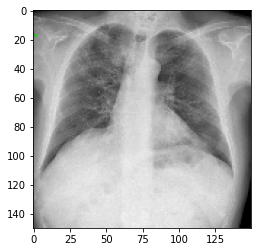

In [53]:
plt.imshow(X_test_scaled[67])